In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Generate random binary data (neurons firing)
np.random.seed(42)  # For reproducibility
num_neurons = 10
num_samples = 100

# Create dataset where each row is a neuron activation pattern
X = np.random.randint(0, 2, size=(num_samples, num_neurons))

# Display a sample of the dataset
print("Generated Dataset (Sample):")
print(X[:5])

Generated Dataset (Sample):
[[0 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 1 1 1 0]
 [1 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 0 1 0 0 0]
 [0 0 1 1 1 1 1 0 1 1]]


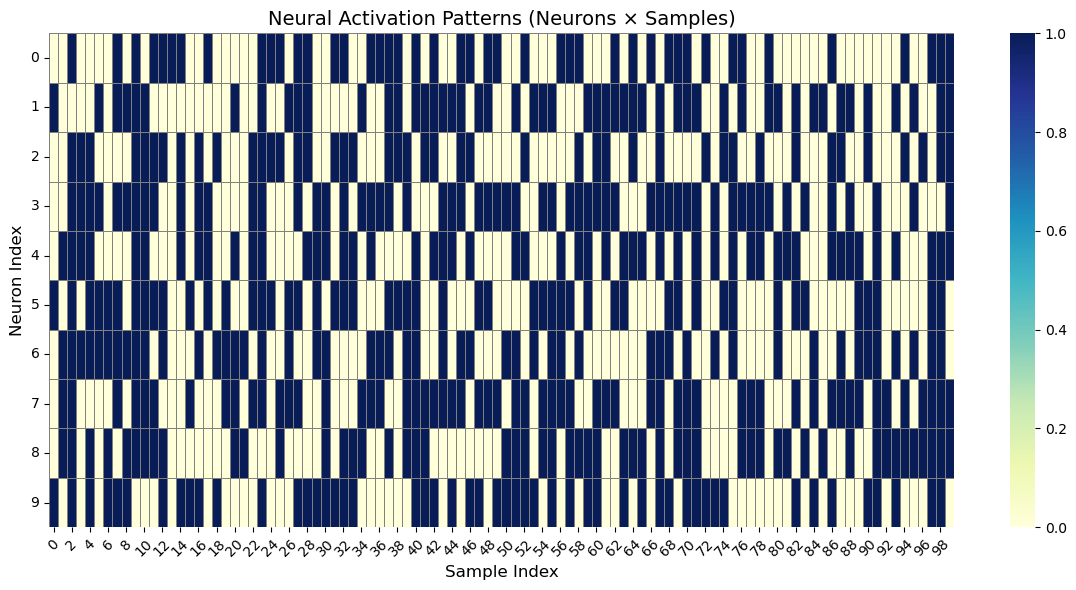

In [5]:
# Plot the dataset to visualize some of the activation patterns
# Convert the dataset to a DataFrame for better axis labeling
df_X = pd.DataFrame(X.T)  # Transpose so that rows = neurons, columns = samples

plt.figure(figsize=(12, 6))
sns.heatmap(df_X, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')
plt.title("Neural Activation Patterns (Neurons × Samples)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Neuron Index", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Neurons fire together wire together

 What This Activation Pattern Chart Shows:
Each row = one neuron (like a bulb)

Each column = one sample (one time signal was given)

Color meaning:

🔵 Dark Blue = Neuron is ON (active, value = 1)

🟡 Light Yellow / White = Neuron is OFF (inactive, value = 0)

🧠 What This Means:
This chart shows when each neuron is ON or OFF during different inputs.

By looking at this chart, we can guess which neurons are working together more often.

In [6]:
# Initialize weights (random small values)
weights = np.random.randn(num_neurons, num_neurons) * 0.01

# Learning rate (can be tuned)
eta = 0.1

Final Weight Matrix:
[[ 0.         13.31876171 18.20950424 18.89423096 14.69101585 16.10491919
  13.28679767 18.91831459 13.3117944  14.69530824]
 [13.28286865  0.         13.9988546  21.01237816 17.48405572 18.89400625
  16.80005244 23.10046981 19.59549935 18.9062285 ]
 [18.1893238  13.99857621  0.         16.10514439 18.20711615 14.68875358
  13.28465886 16.81277677 15.40332314 16.79251513]
 [18.91551152 21.00115675 16.11179297  0.         22.42060748 20.31755341
  20.99751036 26.60971571 22.40645376 18.91368632]
 [14.69035077 17.50686051 18.21058424 22.38241261  0.         16.77960768
  19.59730593 21.70717542 21.01502357 19.60074095]
 [16.11628616 18.88619899 14.68296618 20.29944452 16.80384065  0.
  18.87932558 19.5991088  16.7869553  19.60669673]
 [13.30366598 16.7906012  13.29486133 20.98940786 19.59937321 18.90955142
   0.         19.60504047 18.19469742 18.89207127]
 [18.8989297  23.08964758 16.79446351 26.58802122 21.71964725 19.60035264
  19.59300274  0.         23.09887672 

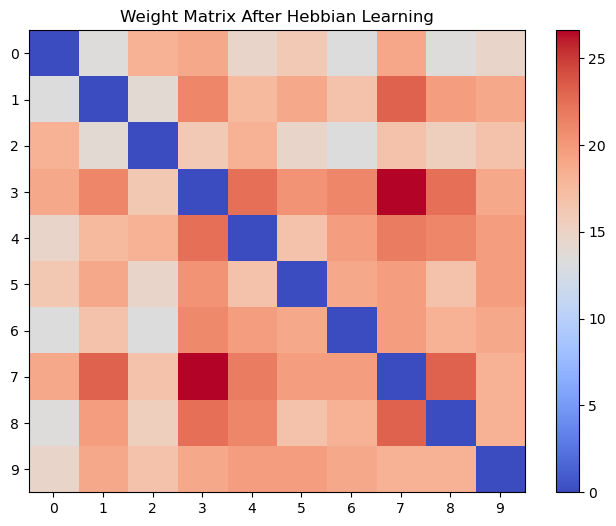

In [18]:
# Hebbian Learning
def hebbian_learning(X, weights, eta):
    for sample in X:
        # Outer product of the sample with itself (Hebbian rule)
        weights += eta * np.outer(sample, sample)  # Update rule

    # Normalize weights for stability (optional)
    np.fill_diagonal(weights, 0)  # No self-connections (diagonal elements)
    return weights

# Train the model with the dataset
weights = hebbian_learning(X, weights, eta)

# Show the final weight matrix
print("Final Weight Matrix:")
print(weights)

plt.figure(figsize=(8, 6))
plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.title("Weight Matrix After Hebbian Learning")
plt.colorbar()

# 👇 Manually set tick positions and labels
num_neurons = weights.shape[0]
plt.xticks(ticks=range(num_neurons), labels=range(num_neurons))
plt.yticks(ticks=range(num_neurons), labels=range(num_neurons))

plt.show()

📊 What This Heatmap Shows:
The heatmap shows how strongly each neuron is connected to every other neuron after Hebbian learning.

Both the X-axis and Y-axis show neuron numbers (0 to 9).

Each square (box) in the heatmap shows the connection strength (weight) between two neurons.

🎨 Color Meaning:
🔵 Blue = Low weight (weak connection between neurons)

⚪ White or Pink = Medium weight (medium connection)

🔴 Red = High weight (strong connection between neurons)

🔻 Diagonal Line (Blue Squares):
These are connections of a neuron with itself (self-connections).

In Hebbian learning, self-connections are usually set to 0.

That’s why the diagonal line is all blue (value = 0).

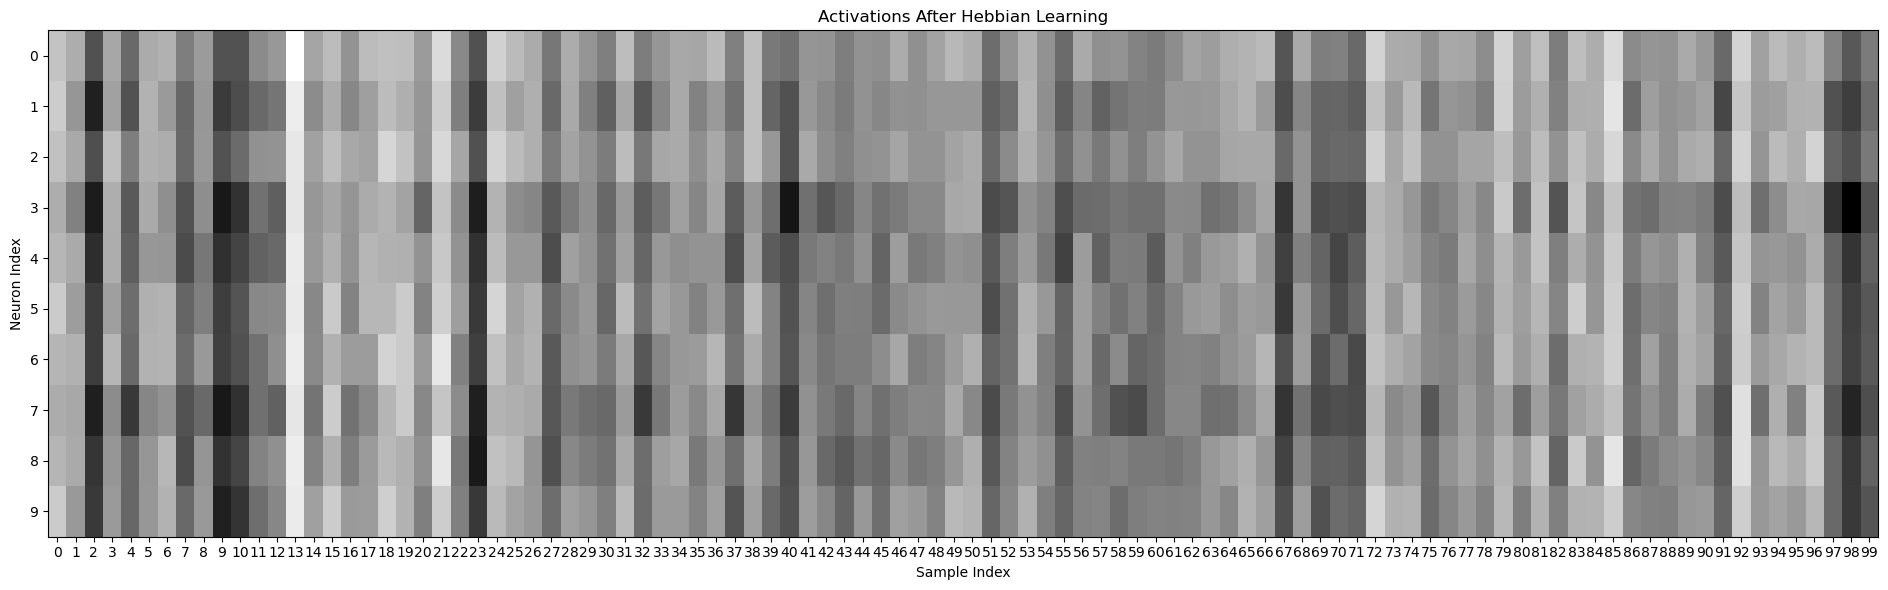

In [23]:
# Evaluate by checking the weight matrix and its alignment with the dataset
def evaluate_learning(X, weights):
    # Evaluate the degree to which each neuron is activated with respect to the learned weights
    activations = np.dot(X, weights)
    
    # Plot learned patterns for comparison
    plt.figure(figsize=(19, 6))
    plt.imshow(activations.T, cmap='binary', aspect='auto')
    plt.title("Activations After Hebbian Learning")
    plt.xlabel("Sample Index")
    plt.ylabel("Neuron Index")
    
    # Show all ticks (0,1,2,3,...)
    num_samples = X.shape[0]
    num_neurons = weights.shape[0]
    plt.xticks(ticks=range(num_samples))  # You can use range(0, num_samples, step) to reduce clutter
    plt.yticks(ticks=range(num_neurons), labels=range(num_neurons))
    
    plt.tight_layout()
    plt.show()

# Evaluate the learned weights
evaluate_learning(X, weights)

📊 "After Hebbian Learning, har neuron kitna activate hua har sample ke liye."

📌 Easy Breakdown:
X-axis (horizontal) = Sample Index
➤ Har column ek alag input (ya data sample) ko show karta hai.

Y-axis (vertical) = Neuron Index
➤ Har row ek neuron ko dikhata hai (0 se 9 tak).

Color Shade:

⚫ Dark Black = Zyada activation (neuron strongly active)

⚪ Light White/Grey = Kam activation (neuron weakly active ya inactive)